In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_CB = pd.read_csv("CloudBiz-SaaS-Sales-origional.csv")
print("AWS: " + str(len(df_CB)))
print("AWS cols: " + str(len(df_CB.columns)))

AWS: 9994
AWS cols: 19


In [3]:
# 1. Import the DataFrame
df_CB = pd.read_csv("CloudBiz-SaaS-Sales-origional.csv")

# 2. Adjust the dates by two years
# Convert to datetime using the correct M/D/YYYY format (e.g., 11/9/2022)
df_CB['Order Date'] = pd.to_datetime(
    df_CB['Order Date'],
    format='%m/%d/%Y',
    errors='coerce' # Set unparseable dates to NaT (Not a Time)
)

# Add two years using the DateOffset function
df_CB['Order Date'] = df_CB['Order Date'] + pd.DateOffset(years=2)

# 3. Save the modified file with "adjusted" added to the name
output_file_name = "CloudBiz-SaaS-Sales.csv"
df_CB.to_csv(output_file_name, index=False)

print(f"Successfully adjusted dates and saved the file as: {output_file_name}")

Successfully adjusted dates and saved the file as: CloudBiz-SaaS-Sales.csv


In [4]:
df_CB.head(5)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2024-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,2024-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,2024-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,2023-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,2023-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [5]:
def plot_all_dataframe_columns(df):
    """
    Generates histograms for numeric columns and bar charts for categorical
    columns in a pandas DataFrame.
    """

    # --- Part 1: Plot Histograms for Numeric Columns ---

    # Select only numeric columns
    numeric_df = df.select_dtypes(include=np.number)

    if not numeric_df.empty:
        print(f"Plotting histograms for {len(numeric_df.columns)} numeric columns...")

        # Determine the grid size for subplots
        num_plots = len(numeric_df.columns)

        # Let's fix columns at 3 for a nice layout
        plot_ncols = 3
        if num_plots < plot_ncols:
            plot_ncols = num_plots

        plot_nrows = int(np.ceil(num_plots / plot_ncols))

        # This call creates its own figure and axes grid
        axes_list = numeric_df.hist(bins=20,
                                    layout=(plot_nrows, plot_ncols),
                                    grid=False,
                                    figsize=(plot_ncols * 5, plot_nrows * 4))

        # Get the figure object from the returned axes list to set title
        fig = None
        if isinstance(axes_list, plt.Axes):
            # Single plot case
            fig = axes_list.get_figure()
        elif isinstance(axes_list, np.ndarray) and axes_list.size > 0:
            # Multiple plots case
            # Flatten and get the first axes to find the figure
            first_ax = axes_list.flatten()[0]
            if first_ax:
                fig = first_ax.get_figure()

        if fig:
            # Set a main title
            fig.suptitle("Histograms for Numeric Columns", fontsize=16, y=1.02)
            plt.tight_layout()
            plt.show()
        else:
            print("Could not retrieve figure to set title.")
    else:
        print("No numeric columns found.")

    # --- Part 2: Plot Bar Charts for Categorical Columns ---

    # Select categorical/object columns
    categorical_df = df.select_dtypes(include=['object', 'category'])

    if not categorical_df.empty:
        print(f"\nPlotting bar charts for {len(categorical_df.columns)} categorical columns...")

        # Determine grid size
        num_plots = len(categorical_df.columns)
        plot_ncols = 3
        if num_plots < plot_ncols:
            plot_ncols = num_plots

        plot_nrows = int(np.ceil(num_plots / plot_ncols))

        fig, axes = plt.subplots(nrows=plot_nrows, ncols=plot_ncols, figsize=(plot_ncols * 5, plot_nrows * 4))

        # Flatten the axes array
        if isinstance(axes, plt.Axes):
            axes_flat = np.array([axes])
        else:
            axes_flat = axes.flatten()

        # Iterate through columns and plot
        for i, col in enumerate(categorical_df.columns):
            ax = axes_flat[i]
            # Get value counts and plot as a bar chart
            value_counts = df[col].value_counts()

            # Limit to top 20 most frequent for readability
            if len(value_counts) > 20:
                value_counts = value_counts.nlargest(20)
                ax.set_title(f"{col}\n(Top 20 categories)")
            else:
                ax.set_title(f"{col}")

            value_counts.plot(kind='bar', ax=ax)
            ax.set_ylabel("Count")
            ax.grid(axis='y', linestyle='--', alpha=0.7)
            # Rotate labels for readability
            ax.tick_params(axis='x', rotation=90)

        # Turn off any unused subplots
        for i in range(num_plots, len(axes_flat)):
            axes_flat[i].axis('off')

        fig.suptitle("Bar Charts for Categorical Columns", fontsize=16, y=1.02)
        plt.tight_layout()
        plt.show()

    else:
        print("No categorical columns found.")

In [6]:
print(df_CB.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Date Key', 'Contact Name',
       'Country', 'City', 'Region', 'Subregion', 'Customer', 'Customer ID',
       'Industry', 'Segment', 'Product', 'License', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')


In [8]:
print("Total Profit: " + str(df_CB["Profit"].sum()))

Total Profit: 286397.0217


In [9]:
print(str(df_CB["Date Key"].min()) + " - " + str(df_CB["Date Key"].max()))

20200104 - 20231231


Plotting histograms for 7 numeric columns...


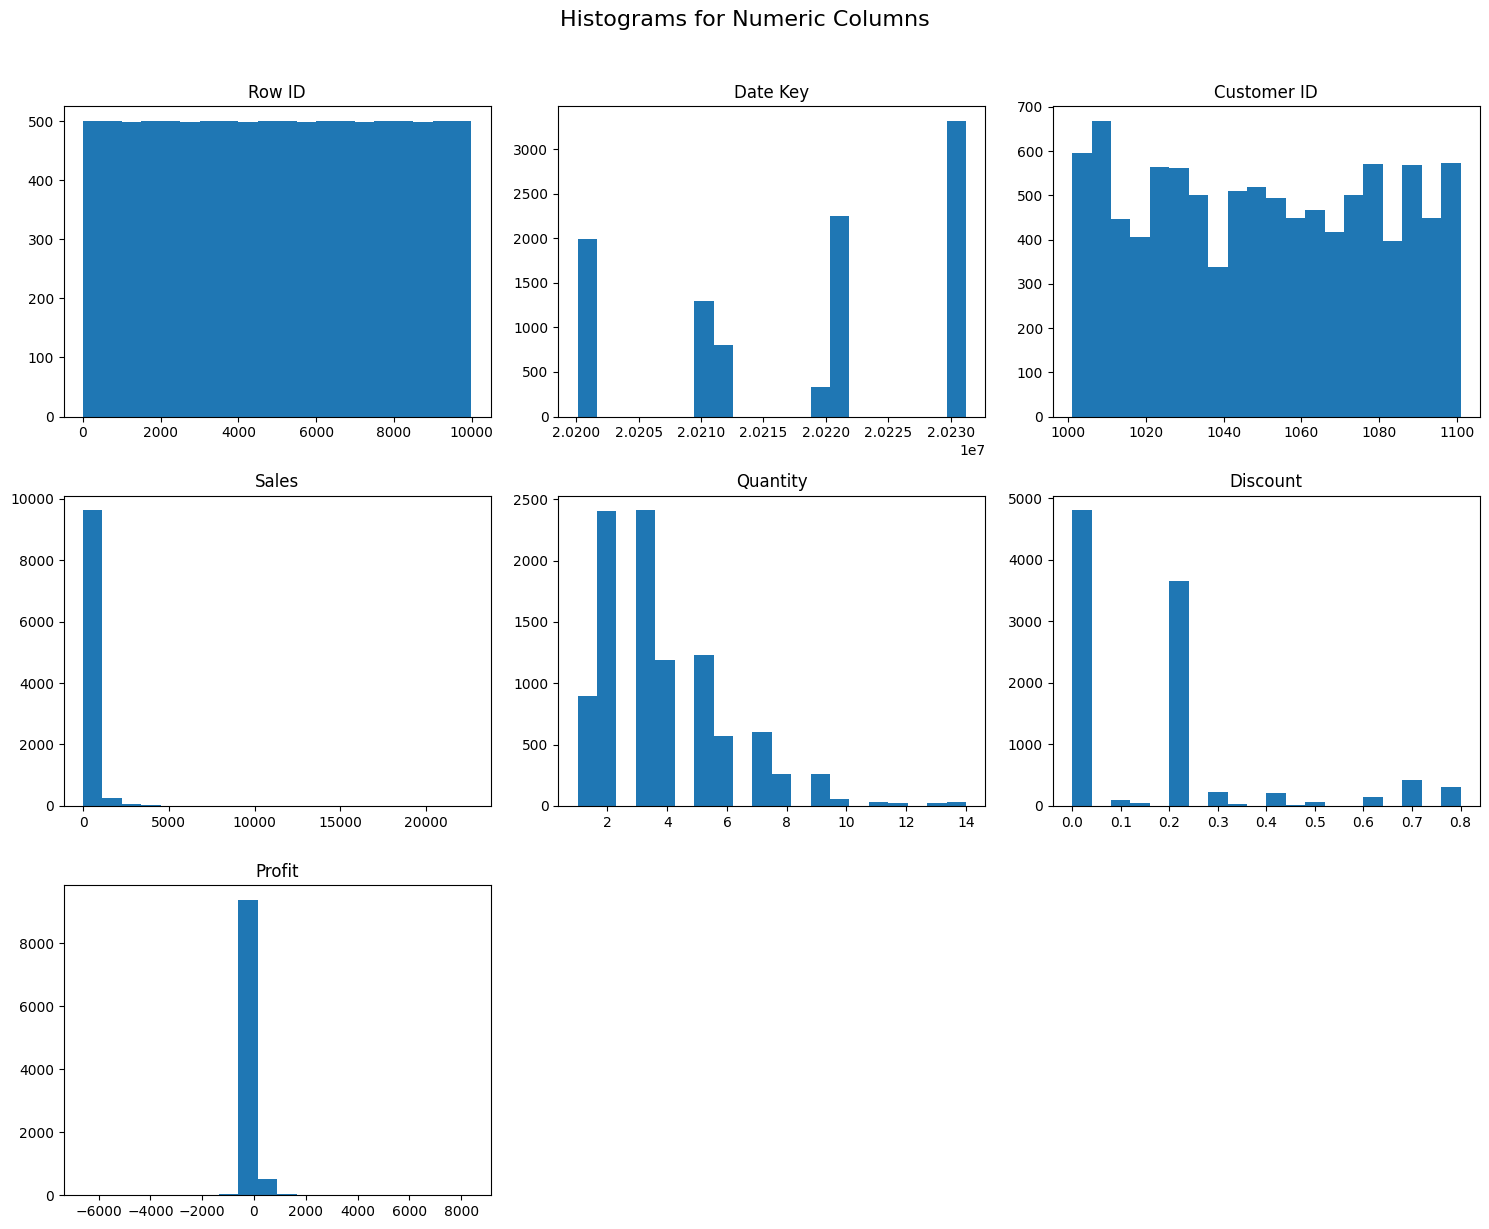


Plotting bar charts for 11 categorical columns...


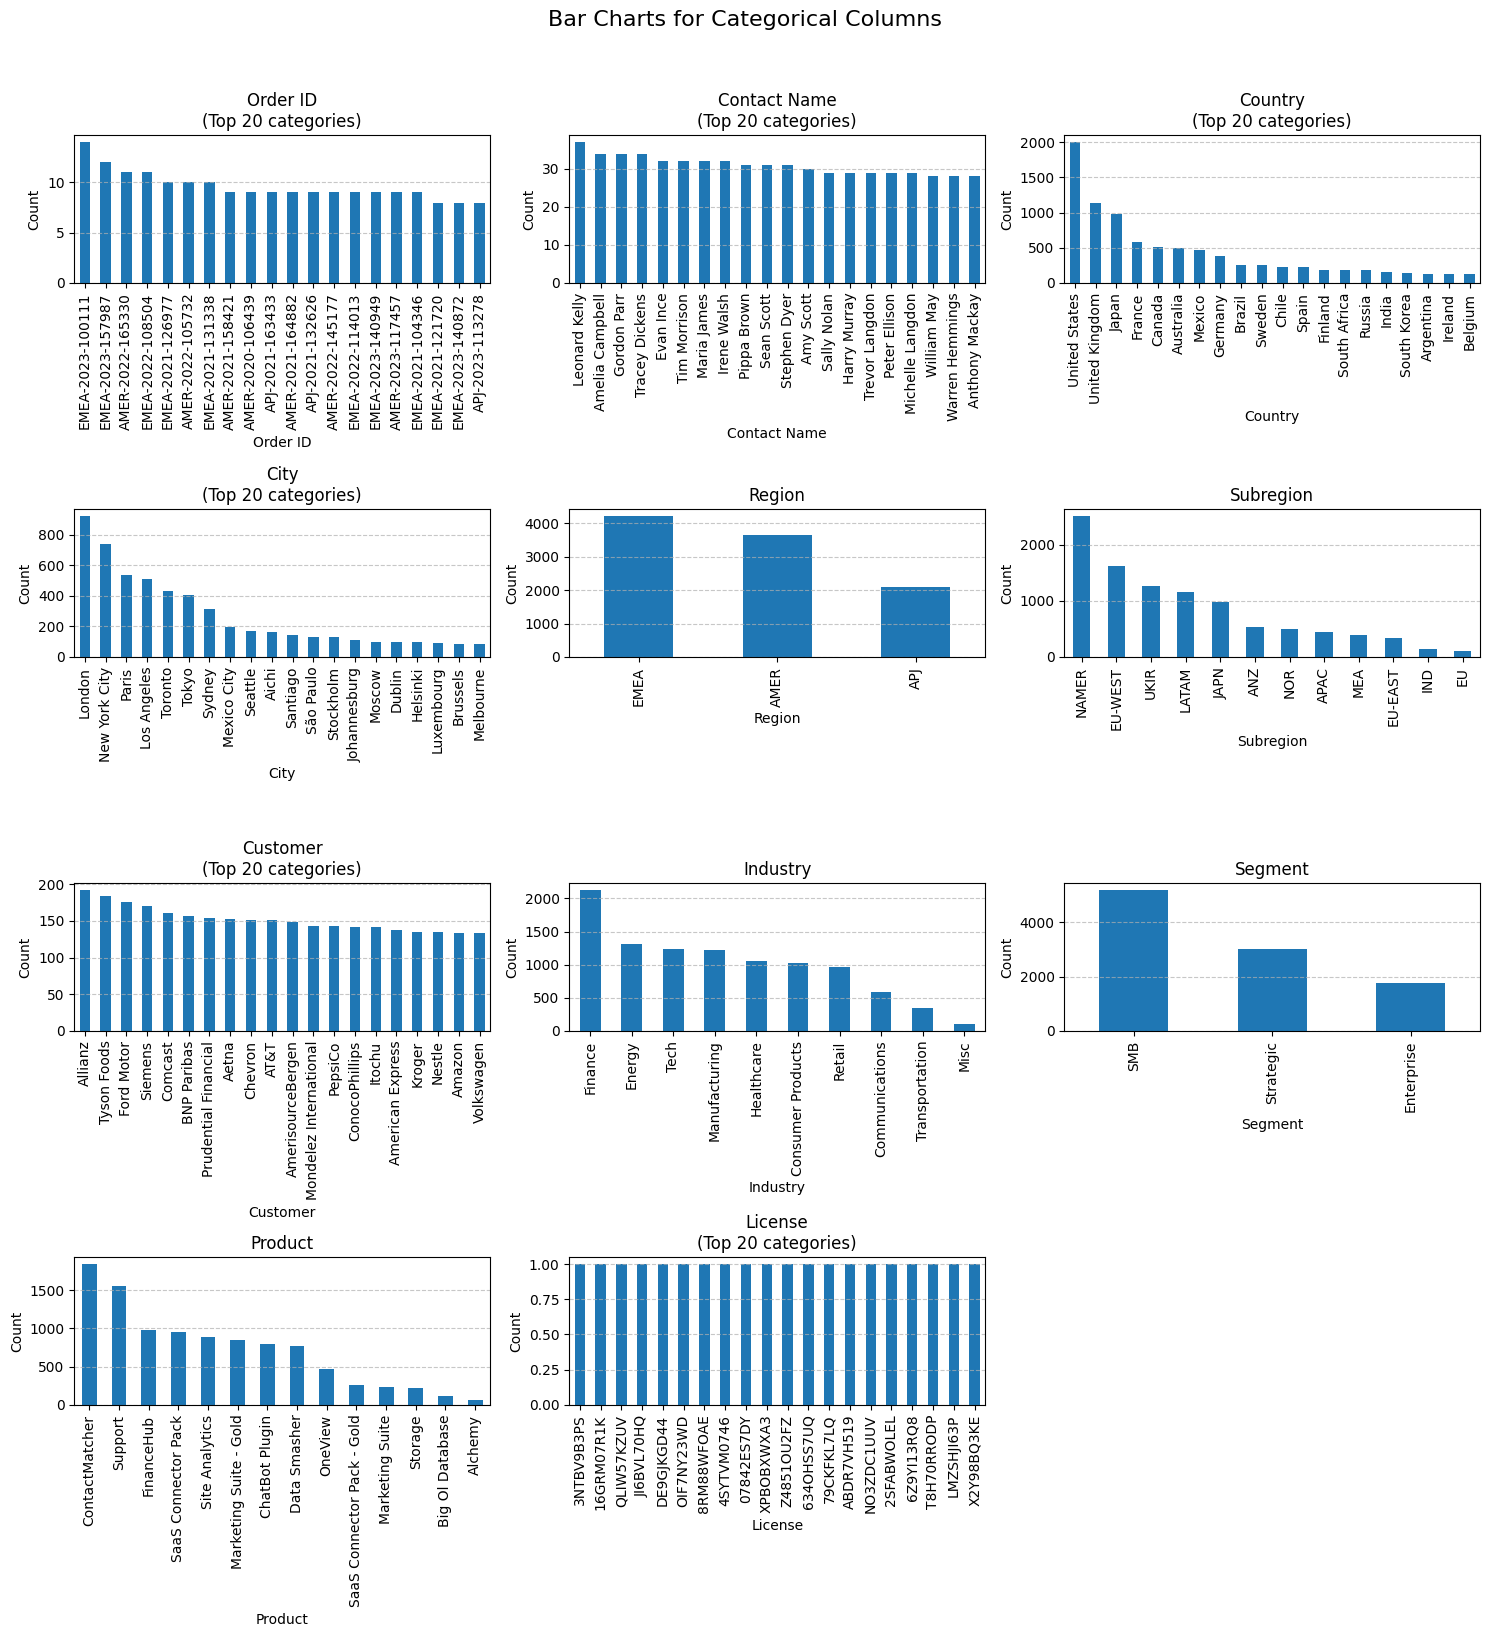

In [10]:
plot_all_dataframe_columns(df_CB)